In [1]:
import numpy as np
import numpy.linalg as LA
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Logistic Regression

## Maximim Log-likelihood

Here we will use logistic regression to conduct a binary classification.  The logistic regression process will be formulated using Maximum Likelihood estimation.  To begin, consider a set of training data where $p_{i}$ refers to the frequency (empirical probability) of outcome $i$ in the training set and $q_{i}$ is the estimated probability of outcome $i$.  Our goal would be to design the distribution $q_{i}$ so that it best matches the empirical distribution $p_{i}$.  This can also be viewed as minimizing the cross entropy between $p$ and $q$.

The likelihood of an outcome, $i$ in a set of data is the probability of event $i$ occurring, raised to the power of the number of occurances in the data.  So, if the probability of event $i$ is $q_{i}$ and $i$ occurs twice in the training data, the likelihood of the outcome $i$ under $q_{i}$ would be $q_{i}^{2}$.  the likelihood of the entire data set is given by:

$\mathcal{L} = \Pi_{i}q_{i}^{p_{i}}$

The log-likelihood is the logarithmic transformation of the likelihood function.  As logarithms are strictly increasing functions, the resulting solution from maximizing the likelihood vs. the log-likelihood are the equivalent.  Given a dataset of cardinality $N$, the log-likelihood (normalized by $N$) is given by:

$l = \frac{1}{N}\sum_{i=1}^{N}\Big(p_{i}\log(q_{i}) + (1 - p_{i})\log(1 - q_{i})\Big)$

## Logistic function

Logistic regression performs binary classification based on a probabilistic interpretation of the data.  Essentially, the process seeks to assign a probability to new observations.  If the probability associated with the new instance of data is greater than 0.5, then the new observation is assigned to 1 (for example).  If the probability associated with the new instance of the data is less than 0.5, then it is assigned to 0.  To map the real numerical values into probabilities (which must lie between 0 and 1), logistic regression makes use of the logistic function, given by:

$\sigma(t) = \frac{1}{1 + e^{-t}}$

Note that by setting $t=0$, $\sigma(0) = 0.5$, which is the decision boundary.  We should also note that the derivative of the logistic function with respect to the parameter $t$ is:

$\frac{d}{dt}\sigma(t) = \sigma(t)(1 - \sigma(t))$

## Logistic Regression and Derivation of the Gradient

Let's assume the training data consists of $N$ observations, where observation $i$ is denoted by the pair $(y_{i},\mathbf{x}_{i})$, where $y \in \{0,1\}$ is the label for the feature vector $\mathbf{x}$.  We wish to compute a linear decision boundary that best seperates the labeled observations.  Let $\mathbf{\theta}$ denote the vector of coefficients to be estimated.  In this problem, the log likelihood can be expressed as:

$l =  \frac{1}{N}\sum_{i=1}^{N}\Big(y_{i}\log\big(\sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\big) + (1 - y_{i}) \log\big( 1 - \sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\big)\Big)$

The gradient of the objective with respect to the $j^{th}$ element of $\mathbf{\theta}$ is:
$$
\begin{aligned}
\frac{d}{d\theta^{(j)}} l &=  \frac{1}{N}\sum_{i=1}^{N}\Bigg( \frac{d}{d\theta^{(j)}} y_{i}\log\big(\sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\big) + \frac{d}{d\theta^{(j)}}(1 - y_{i}) \log\big( 1 - \sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\big)\Bigg) \\
&= \frac{1}{N}\sum_{i=1}^{N}\Bigg(\frac{y_{i}}{\sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})} + \frac{1 - y_{i}}{1 - \sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})} \Bigg)\frac{d}{d\theta^{(j)}}\sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\\
&= \frac{1}{N}\sum_{i=1}^{N}\Bigg(\frac{y_{i}}{\sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})} + \frac{1 - y_{i}}{1 - \sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})} \Bigg)\sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\Big(1 - \sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\Big)x_{i}^{(j)}\\
&=  \frac{1}{N}\sum_{i=1}^{N}\Bigg(\frac{y_{i} - \sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})}{\sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\Big(1 - \sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\Big)}\Bigg)\sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\Big(1 - \sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\Big)x_{i}^{(j)}\\
&= \frac{1}{N}\sum_{i=1}^{N}\Bigg(y_{i} - \sigma(\mathbf{\theta}^{T}\mathbf{x}_{i})\Bigg)x_{i}^{(j)}
\end{aligned}
$$

where the last equation has the familiar form of the product of the prediciton error and the $j^{th}$ feature.  With the gradient of the log likelihood function, the parameter vector $\mathbf{\theta}$ can now be calculated via gradient ascent (as we're <em>maximizing</em> the log likelihood):

$$
\begin{equation}
    \mathbf{\theta}^{(j)}(k+1) = \mathbf{\theta}^{(j)}(k) + \alpha \frac{1}{N}\sum_{i=1}^{N}\Bigg( y_{i} - \sigma(\mathbf{\theta}^{T}(k)\mathbf{x}_{i}))\Bigg)x_{i}^{(j)}
\end{equation}
$$

In [2]:
# Supporting Methods

#logistic function
def sigmoid(a):
    return 1/(1 + np.exp(-a))

#ll function
def log_likelihood(x, y, theta):
    logits = np.dot(x, theta)
    log_like = np.sum(y * logits - np.log(1 + np.exp(logits)))
    return log_like

In [3]:
#Load the data
iris = datasets.load_iris()
x = iris.data[:,2:]                    #features will be petal width and petal length
y = (iris.target==2).astype(np.int).reshape(len(x),1)    #1 of iris-virginica, and 0 ow

#Prepare Data for Regression
#pad x with a vector of ones for computation of intercept
x_aug = np.concatenate( (x,np.ones((len(x),1))) , axis=1)

In [8]:
#sklearn logistic regression
log_reg = LogisticRegression(penalty='none')
log_reg.fit(x,y)
log_reg.get_params()
coefs = log_reg.coef_.reshape(-1,1)
intercept = log_reg.intercept_
theta_sklearn = np.concatenate((coefs, intercept.reshape(-1,1)), axis=0)
print("sklearn coefficients:")
print(theta_sklearn)
print("sklearn log likelihood: ", log_likelihood(x_aug, y, theta_sklearn))

sklearn coefficients:
[[  5.75452053]
 [ 10.44681116]
 [-45.27248307]]
sklearn log likelihood:  -10.281754052558687


In [5]:
#Perform Logistic Regression
num_iterations = 2000000
epsilon = 1e-4
alpha = 0.00005

theta0 = np.ones((3,1))
theta = []
theta.append(theta0)

k=0
while k < num_iterations:
    
    #compute prediction error
    e = y - sigmoid(np.dot(x_aug, theta[k]))

    #compute the gradient of the log-likelihood
    grad_ll = np.dot(x_aug.T, e)

    #gradient ascent
    theta.append(theta[k] + alpha * grad_ll)

    #update iteration step
    k += 1

    if k % 100000 == 0:
        #print("iteration: ", k, " delta: ", delta)
        print("iteration: ", k, " log_likelihood:", log_likelihood(x_aug, y, theta[k]))
    
theta_final = theta[k]
print("scratch coefficients:")
print(theta_final)

iteration:  100000  log_likelihood: -19.519333259673353
iteration:  200000  log_likelihood: -15.991285337276258
iteration:  300000  log_likelihood: -14.403835047797802
iteration:  400000  log_likelihood: -13.475244310817367
iteration:  500000  log_likelihood: -12.859607209252484
iteration:  600000  log_likelihood: -12.419918163928317
iteration:  700000  log_likelihood: -12.089945591193482
iteration:  800000  log_likelihood: -11.83338816139517
iteration:  900000  log_likelihood: -11.628536890748723
iteration:  1000000  log_likelihood: -11.461547224704969
iteration:  1100000  log_likelihood: -11.323142383716531
iteration:  1200000  log_likelihood: -11.20685744112481
iteration:  1300000  log_likelihood: -11.108040869184535
iteration:  1400000  log_likelihood: -11.023256075455755
iteration:  1500000  log_likelihood: -10.949906765470173
iteration:  1600000  log_likelihood: -10.88599371593767
iteration:  1700000  log_likelihood: -10.829951887372212
iteration:  1800000  log_likelihood: -10.78

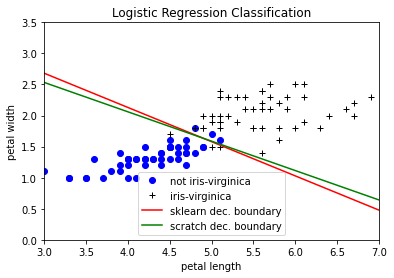

In [6]:
#Plot the data and the decision boundary

#create feature data for plotting
x_dec_bnd = np.linspace(0,7,100).reshape(-1,1)
#classification boundary from sklearn
y_sklearn = (theta_sklearn[2] * np.ones((100,1)) + theta_sklearn[0] * x_dec_bnd) / -theta_sklearn[1]
#classification boundary from scratch
y_scratch = (theta_final[2] * np.ones((100,1)) + theta_final[0] * x_dec_bnd) / -theta_final[1]

y_1 = np.where(y==1)[0] #training data, iris-virginica
y_0 = np.where(y==0)[0] #training data, not iris-virginica
plt.plot(x[y_0,0],x[y_0,1],'bo',label="not iris-virginica")
plt.plot(x[y_1,0],x[y_1,1],'k+',label="iris-virginica")
plt.plot(x_dec_bnd,y_sklearn,'r',label="sklearn dec. boundary")
plt.plot(x_dec_bnd,y_scratch,'g',label="scratch dec. boundary")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Logistic Regression Classification')
plt.xlim((3,7))
plt.ylim((0,3.5))
plt.legend()
plt.show()